In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [2]:
count = 0 
dirs = os.listdir('data/')
for dir in dirs:
    files = list(os.listdir('data/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

Acorales Folder has 41 Images
Alismatales Folder has 48 Images
Apiales Folder has 171 Images
Arecales Folder has 118 Images
Asparagales Folder has 93 Images
Asterales Folder has 70 Images
Boraginales Folder has 55 Images
Brassicales Folder has 66 Images
Caryophyllales Folder has 66 Images
Commelinales Folder has 54 Images
Cucurbitales Folder has 86 Images
Ericales Folder has 66 Images
Fabales Folder has 56 Images
Gentianales Folder has 99 Images
Lamiales Folder has 43 Images
Laurales Folder has 64 Images
Magnoliales Folder has 66 Images
Malpighiales Folder has 65 Images
Malvales Folder has 45 Images
Myrtales Folder has 72 Images
Oxalidales Folder has 66 Images
Piperales Folder has 59 Images
Poales Folder has 67 Images
Ranunculales Folder has 59 Images
Rosales Folder has 64 Images
Salviniales Folder has 75 Images
Sapindales Folder has 66 Images
Saxifragales Folder has 57 Images
Solanales Folder has 55 Images
Zingiberales Folder has 146 Images
Zygophyllales Folder has 72 Images
Images Fo

In [3]:
# import os
# import cv2
# import imghdr
# import numpy as np

# data_dir = 'data'
# image_exts = ['jpeg', 'jpg', 'png']

# def has_alpha_channel(image_path):
#     img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
#     if img is None:
#         return False
#     # Check if the image has an alpha channel
#     return img.shape[2] == 4 if len(img.shape) == 3 else False

# for image_class in os.listdir(data_dir): 
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try: 
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts: 
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#             elif has_alpha_channel(image_path):
#                 print('Image has transparency {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e: 
#             print('Issue with image {}'.format(image_path))
#             print(e)

In [4]:
# import os

# def rename_files_in_directory(base_dir):
#     for root, dirs, files in os.walk(base_dir):
#         count = 1
#         for name in files:
#             file_extension = os.path.splitext(name)[1]  # Get file extension
#             new_name = f"{count}{file_extension}"
#             old_path = os.path.join(root, name)
#             new_path = os.path.join(root, new_name)
            
#             if os.path.exists(new_path):
#                 print(f"Skipped renaming {old_path} as {new_path} already exists")
#                 continue
            
#             # Replace non-UTF-8 characters with '_'
#             new_name = ''.join(x if x.isalnum() or x in ('.', '_') else '_' for x in new_name)
            
#             os.rename(old_path, new_path)
#             print(f"Renamed {old_path} to {new_path}")
#             count += 1

# base_dir = r'data/'
# rename_files_in_directory(base_dir)


In [5]:
base_dir = r'data/'
img_size = 224
batch_size = 32

In [6]:
import tensorflow as tf

def image_dataset_from_directory_utf8(directory, **kwargs):
    return tf.keras.utils.image_dataset_from_directory(directory, **kwargs)

# Usage
base_dir = r'data'  # Assuming this is your base directory
full_dataset = image_dataset_from_directory_utf8(
    base_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch_size
)

# Get class names
class_names = full_dataset.class_names

# Calculate the number of batches
num_batches = len(full_dataset)
num_train = int(0.7 * num_batches)
num_val = int(0.1 * num_batches)
num_test = num_batches - num_train - num_val

# Split the dataset into train, validation, and test datasets
train_ds = full_dataset.take(num_train)
temp_ds = full_dataset.skip(num_train)
val_ds = temp_ds.take(num_val)
test_ds = temp_ds.skip(num_val)

# Print the sizes of each dataset
print("Train dataset size:", len(train_ds))
print("Validation dataset size:", len(val_ds))
print("Test dataset size:", len(test_ds))


Found 2230 files belonging to 31 classes.
Train dataset size: 49
Validation dataset size: 7
Test dataset size: 14


In [7]:
order_names = full_dataset.class_names
order_names

['Acorales',
 'Alismatales',
 'Apiales',
 'Arecales',
 'Asparagales',
 'Asterales',
 'Boraginales',
 'Brassicales',
 'Caryophyllales',
 'Commelinales',
 'Cucurbitales',
 'Ericales',
 'Fabales',
 'Gentianales',
 'Lamiales',
 'Laurales',
 'Magnoliales',
 'Malpighiales',
 'Malvales',
 'Myrtales',
 'Oxalidales',
 'Piperales',
 'Poales',
 'Ranunculales',
 'Rosales',
 'Salviniales',
 'Sapindales',
 'Saxifragales',
 'Solanales',
 'Zingiberales',
 'Zygophyllales']

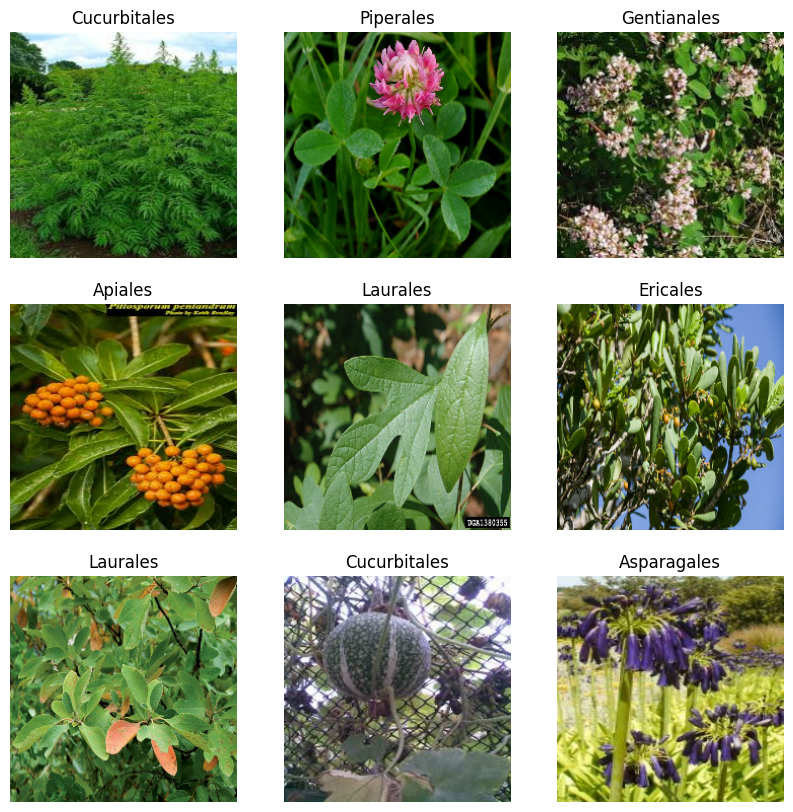

In [8]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(order_names[labels[i]])
        plt.axis('off')

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [11]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [12]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (224,224,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

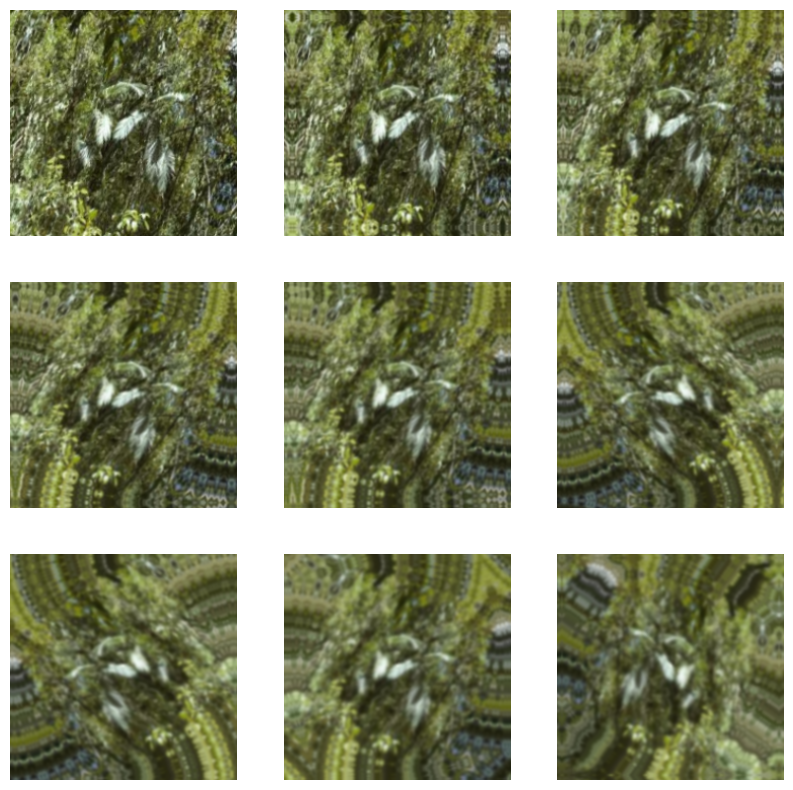

In [13]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False

model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(31)
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 31)                3999      
                                                                 
Total params: 23853983 (91.00 MB)
Trainable params: 266271 (1.02 MB)
Non-trainable params: 23587712 (89.98 MB)
_________

1/1 [==============================] - 1s 1s/step
Visualizing activations for layer: conv1_conv


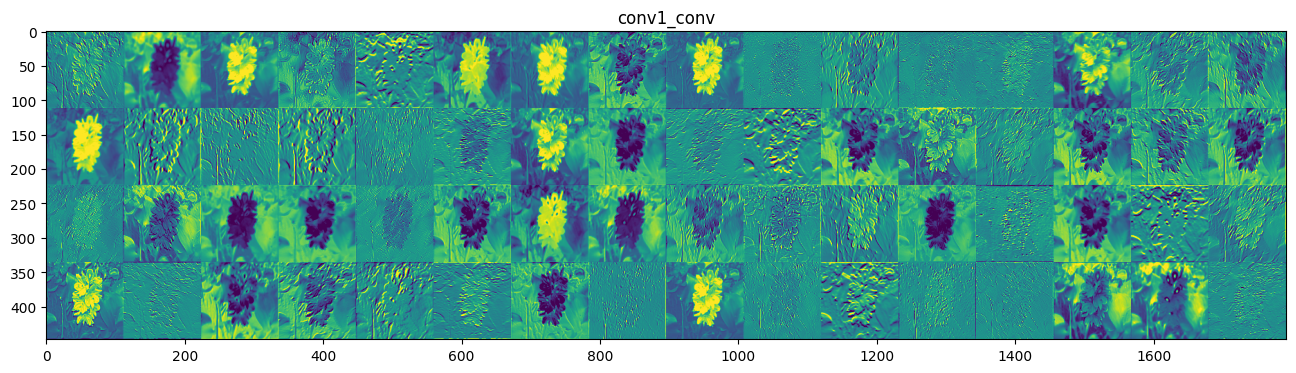

Visualizing activations for layer: conv2_block1_2_conv


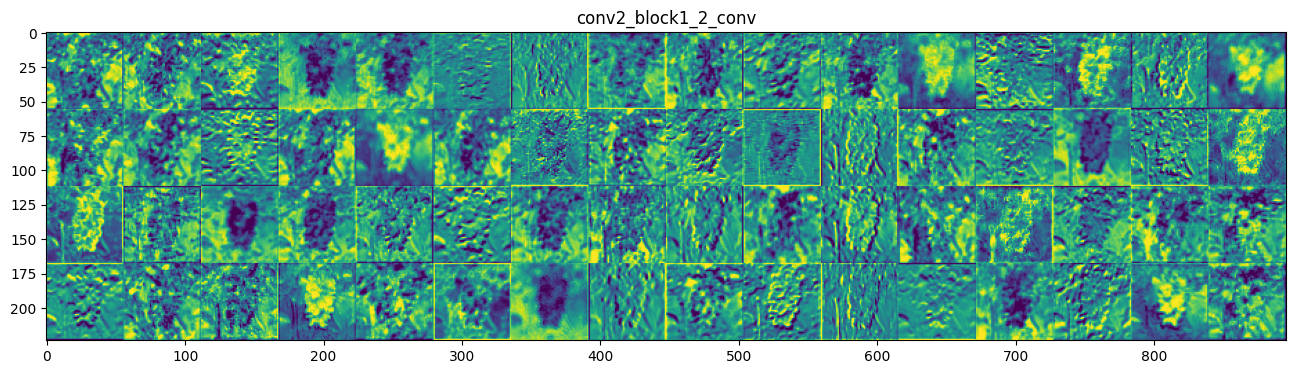

Visualizing activations for layer: conv3_block1_2_conv


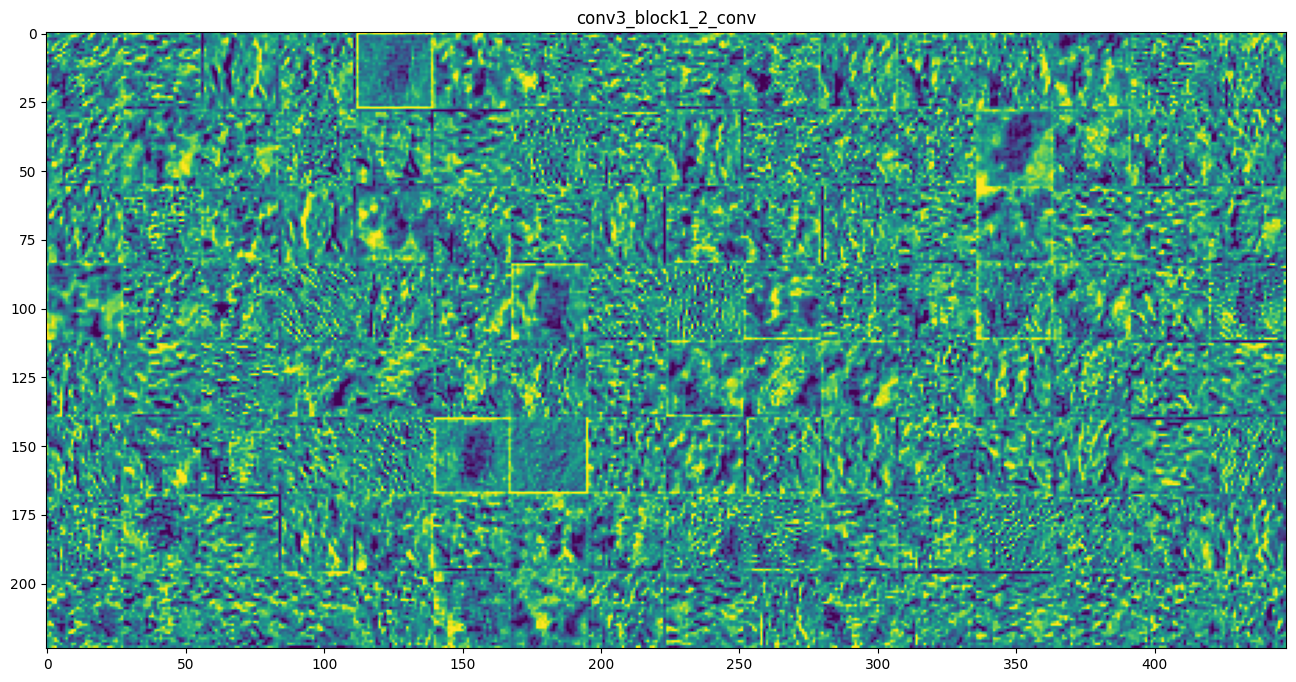

Visualizing activations for layer: conv3_block3_2_conv


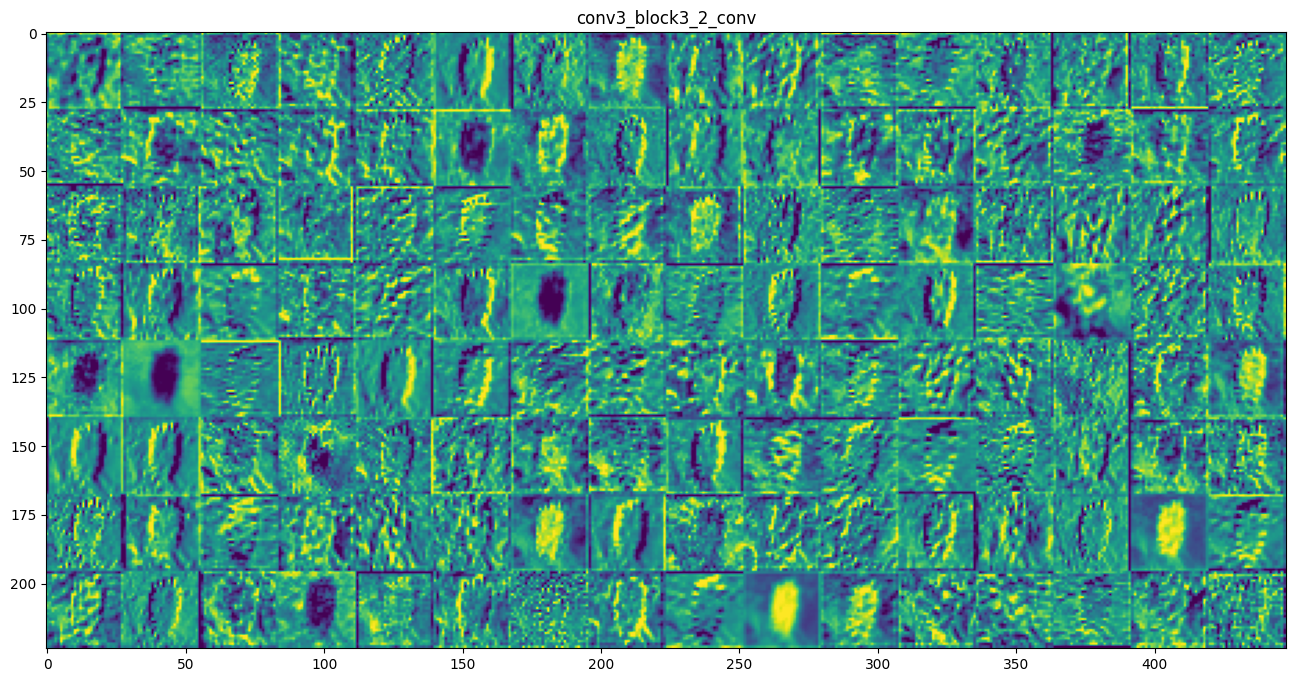

Visualizing activations for layer: conv4_block6_2_conv


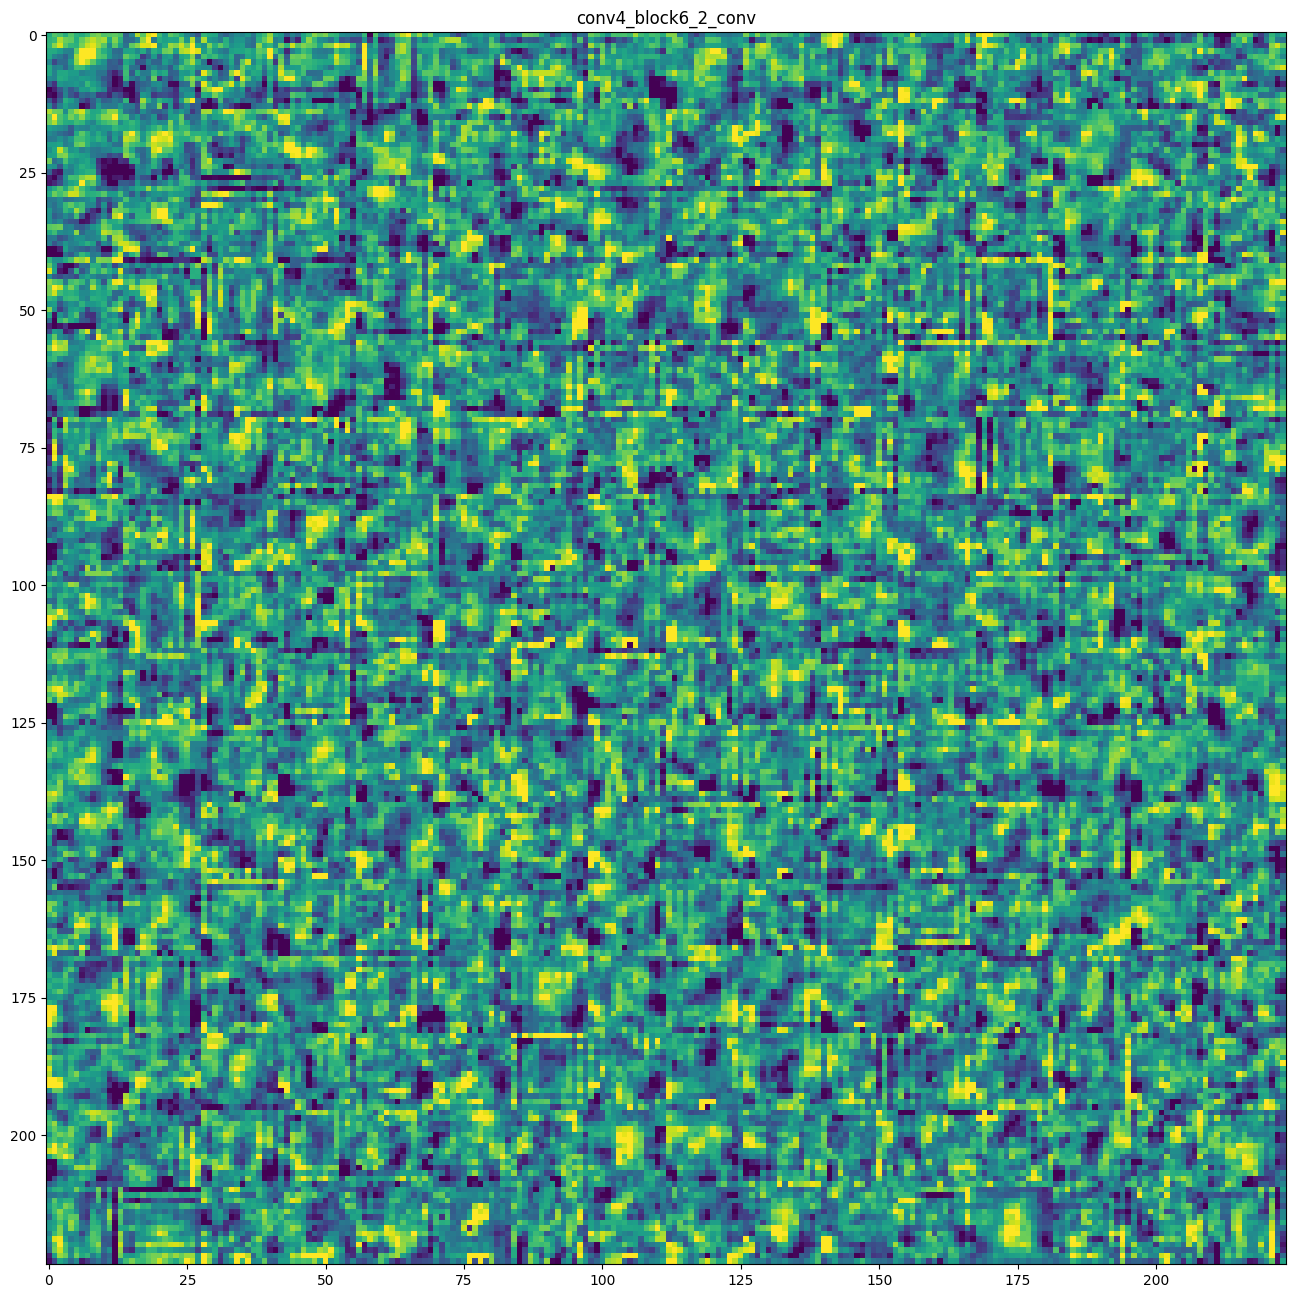

Visualizing activations for layer: conv5_block3_2_conv


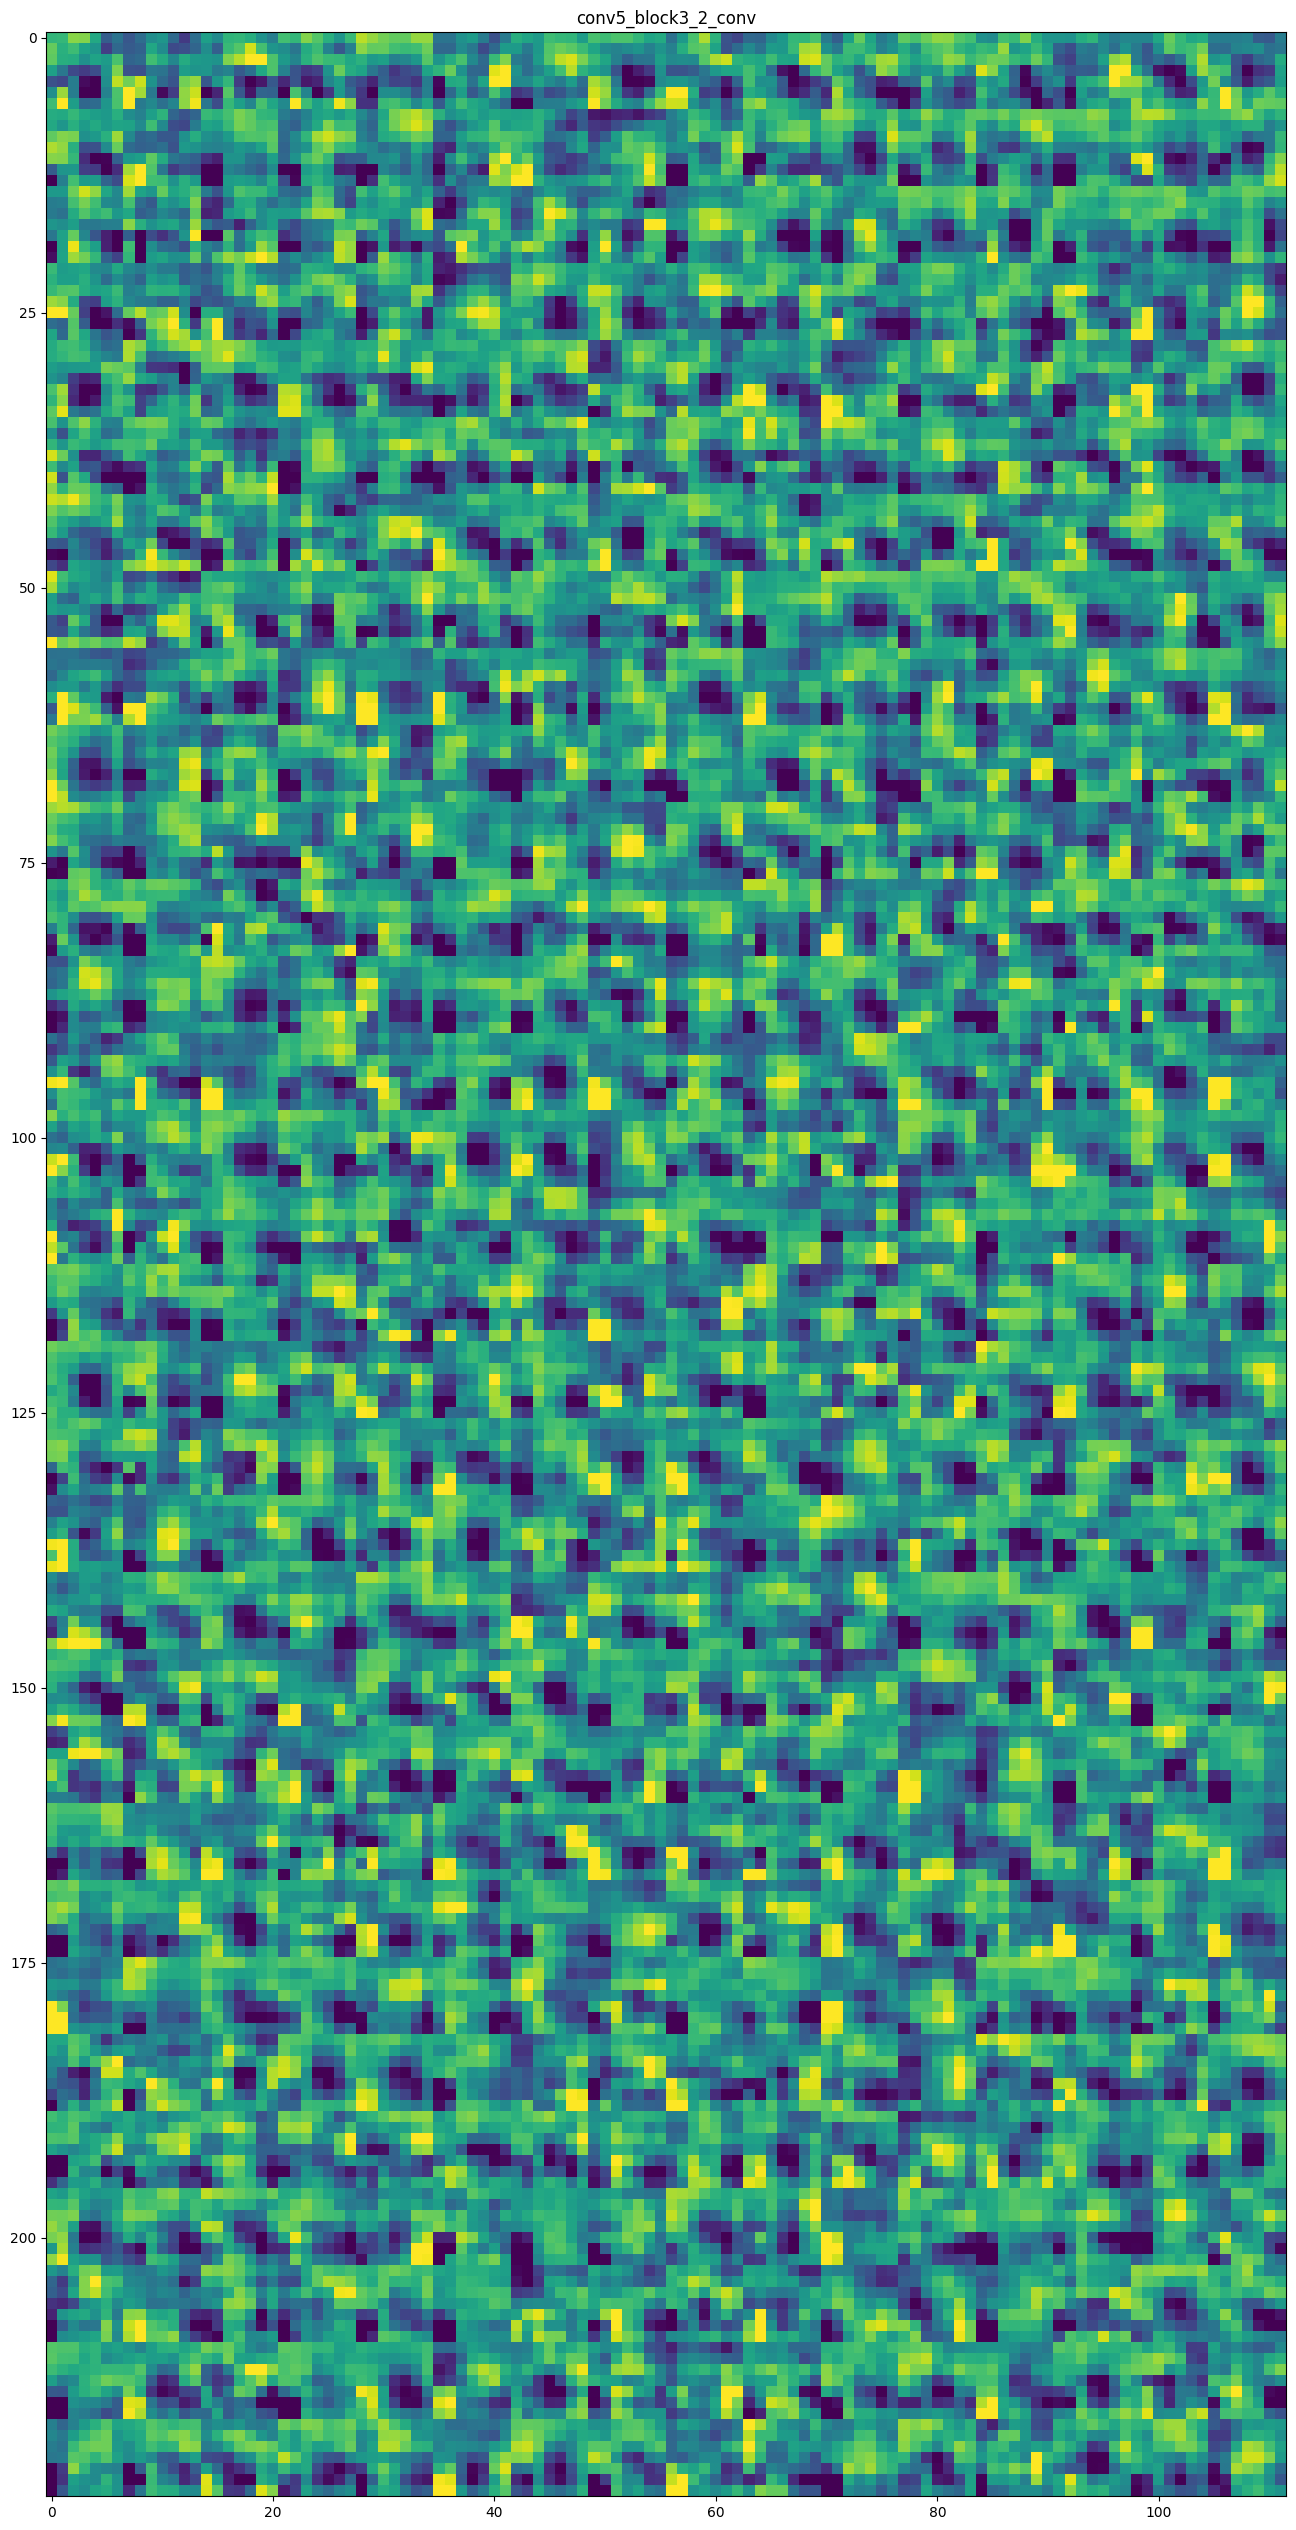

In [18]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, Model

# Load and preprocess a sample image
img_path = 'commelinales.png'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.mobilenet_v3.preprocess_input(img_array)

activations = visualization_model.predict(img_array)

# Define layers whose activations you want to visualize
layer_names = [
    'conv1_conv',
    'conv2_block1_2_conv',
    'conv3_block1_2_conv',
    'conv3_block3_2_conv',
    'conv4_block6_2_conv',
    'conv5_block3_2_conv'
]
outputs = [base_model.get_layer(name).output for name in layer_names]
visualization_model = Model(inputs=base_model.input, outputs=outputs)

# Visualize activations
for layer_name, layer_activation in zip(layer_names, activations):
    print(f"Visualizing activations for layer: {layer_name}")
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    
    n_cols = n_features // 16
    display_grid = np.zeros((size * n_cols, 16 * size))
    
    for col in range(n_cols):
        for row in range(16):
            channel_image = layer_activation[0, :, :, col * 16 + row]
            channel_image -= channel_image.mean()
            if channel_image.std() != 0:
                channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
    
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=3)

history = model.fit(train_ds,
                    epochs=100,
                    validation_data=val_ds,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
49/49 [==============================] - 189s 4s/step - loss: 3.6299 - accuracy: 0.0740 - val_loss: 3.3945 - val_accuracy: 0.1161 - lr: 1.0000e-04
Epoch 2/100
49/49 [==============================] - 170s 3s/step - loss: 3.1347 - accuracy: 0.1767 - val_loss: 3.1791 - val_accuracy: 0.1741 - lr: 1.0000e-04
Epoch 3/100
49/49 [==============================] - 168s 3s/step - loss: 2.9079 - accuracy: 0.2309 - val_loss: 3.0067 - val_accuracy: 0.1875 - lr: 1.0000e-04
Epoch 4/100
49/49 [==============================] - 168s 3s/step - loss: 2.6955 - accuracy: 0.2946 - val_loss: 2.8605 - val_accuracy: 0.2366 - lr: 1.0000e-04
Epoch 5/100
49/49 [==============================] - 169s 3s/step - loss: 2.5271 - accuracy: 0.3284 - val_loss: 2.7204 - val_accuracy: 0.3080 - lr: 1.0000e-04
Epoch 6/100
49/49 [==============================] - 170s 3s/step - loss: 2.3624 - accuracy: 0.3814 - val_loss: 2.6124 - val_accuracy: 0.3348 - lr: 1.0000e-04
Epoch 7/100
49/49 [===========================

In [20]:
test_pred = model.predict(test_ds)
test_pred = np.argmax(test_pred, axis=1)

test_labels = np.concatenate([y for x, y in test_ds], axis=0)

14/14 [==============================] - 36s 2s/step


In [21]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_labels, test_pred)

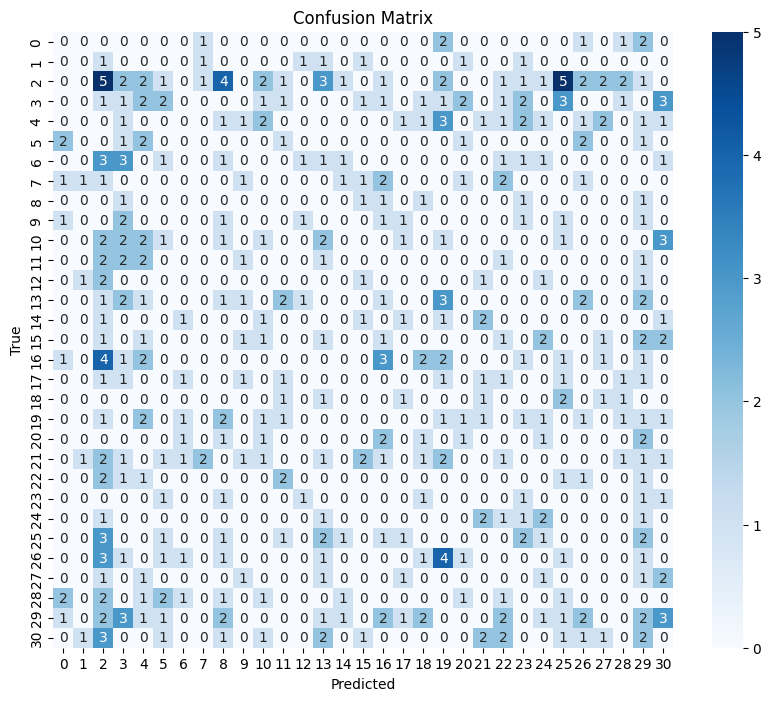

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

14/14 [==============================] - 33s 2s/step - loss: 1.8515 - accuracy: 0.5434
Test Loss: 1.8514769077301025
Test Accuracy: 0.543379008769989


In [24]:
y_true = []
y_pred = []

In [25]:
for images, labels in test_ds:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())

# Generate classification report
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 [==============================] - 2s 2s/step
                precision    recall  f1-score   support

      Acorales       0.90      0.82      0.86        11
   Alismatales       0.60      0.43      0.50         7
       Apiales       0.71      0.94      0.81        32
      Arecales       0.77      0.77      0.77        22
   Asparagales       0.39      0.35      0.37        20
     Asterales       0.36      0.50      0.42         8
   Boraginales       0.62      0.36      0.45        14
   Brassicales       0.33      0.10      0.15        10
Caryophyllales       0.38      0.55      0.44        11
  Commelinales       0.50      0.21      0.30        14
  Cucurbitales       0.74      0.78      0.76        18
      Ericales       0.45      0.45      0.45        11
       Fabales       0.75      0.33      0.46         9
   Gentianales       0.41      0.45      0.43        20
      Lamiales       0.00      0.00      0.00        10
      Laurales       0.17      0.08      0.11        

In [26]:
model.save('models/plantae_resnet.h5')

c:\Users\Ate Sheesha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(224, 224))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0]).numpy()  # Convert tensor to NumPy array
    
    # Get the top 3 predictions
    top_3_indices = np.argsort(result)[-4:][::-1]
    top_3_scores = result[top_3_indices]
    
    outcome = "Top 3 matches:\n"
    for i in range(3):
        outcome += f"{i+1}. {order_names[top_3_indices[i]]} with a score of {top_3_scores[i] * 100:.2f}%\n"
    
    return outcome

In [28]:
print(classify_images('alismatales.png'))

1/1 [==============================] - 0s 103ms/step
Top 3 matches:
1. Alismatales with a score of 52.02%
2. Magnoliales with a score of 9.07%
3. Ericales with a score of 9.00%



In [29]:
print(classify_images('commelinales.png'))

1/1 [==============================] - 0s 103ms/step
Top 3 matches:
1. Solanales with a score of 17.65%
2. Ranunculales with a score of 16.70%
3. Myrtales with a score of 15.00%

